**HOTEL DI DKI JAKARTA**
        1. Tujuan dari analisis ini adalah untuk mengetahui jumlah pendapatan rata-rata setiap hotel perbulannya, serta kaitannya dengan dengan tingkat okupansi dan fasilitas yang ditawarkan hotel terhadap perolehan pendapatan tersebut menggunakan Linier Regression model.



In [1]:
#Library yang digunakan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
#Load Data 
hotel = pd.read_excel('merge data tahun 2016-2018.xlsx')
hotel.head()

,jenis_hotel,tahun,bulan,Okupansi,jumlah_kamar,harga,rating,ac,restaurant,parkir,wifi,kolam renang,Tingkat Pendapatan
0,Bintang 1,2016,1,8.3,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.126135e+06
1,Bintang 1,2016,2,18.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,4.636512e+06
2,Bintang 1,2016,3,2.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,5.379379e+05
3,Bintang 1,2016,4,11.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.843386e+06
4,Bintang 1,2016,5,89.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.282393e+07


In [3]:
#Mengetahui tipe data variabel yang digunakan
hotel.dtypes

jenis_hotel            object
tahun                   int64
bulan                   int64
Okupansi              float64
jumlah_kamar          float64
harga                 float64
rating                float64
ac                      int64
restaurant            float64
parkir                  int64
wifi                  float64
kolam renang          float64
Tingkat Pendapatan    float64
dtype: object

In [4]:
#Melihat apakah terdapat missing value
hotel.isnull().sum()

jenis_hotel           0
tahun                 0
bulan                 0
Okupansi              0
jumlah_kamar          0
harga                 0
rating                0
ac                    0
restaurant            0
parkir                0
wifi                  0
kolam renang          0
Tingkat Pendapatan    0
dtype: int64

In [5]:
#menginisialisasi dictionary untuk jenis_hotel

hotel['jenis_hotel'] = hotel.jenis_hotel.map({'Bintang 1' : 1, 'Bintang 2' : 2, 'Bintang 3' : 3, 'Bintang 4' : 4, 'Bintang 5' : 5})

In [6]:
hotel.head()

,jenis_hotel,tahun,bulan,Okupansi,jumlah_kamar,harga,rating,ac,restaurant,parkir,wifi,kolam renang,Tingkat Pendapatan
0,1,2016,1,8.3,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.126135e+06
1,1,2016,2,18.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,4.636512e+06
2,1,2016,3,2.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,5.379379e+05
3,1,2016,4,11.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.843386e+06
4,1,2016,5,89.1,101.866667,251466.834267,7.064286,1,0.733333,1,1.0,0.0,2.282393e+07


In [7]:
hotel.dtypes

jenis_hotel             int64
tahun                   int64
bulan                   int64
Okupansi              float64
jumlah_kamar          float64
harga                 float64
rating                float64
ac                      int64
restaurant            float64
parkir                  int64
wifi                  float64
kolam renang          float64
Tingkat Pendapatan    float64
dtype: object

In [8]:
#Uji normalitas data
from scipy.stats import kstest, shapiro


# Uji Kolmogorov-Smirnov (kstest) dan Uji Shapiro-Wilk (shapiro)
ksdata = kstest(hotel['harga'], 'norm')
swdata = shapiro(hotel['harga'])
print(ksdata)
print(swdata)

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.7271013855934143, pvalue=6.518079333032921e-17)


In [12]:
#Uji normalitas data
from scipy.stats import kstest, shapiro


# Uji Kolmogorov-Smirnov (kstest) dan Uji Shapiro-Wilk (shapiro)

ksdata = kstest(hotel['Tingkat_Pendapatan'], 'norm')
swdata = shapiro(hotel['Tingkat_Pendapatan'])
print(ksdata)
print(swdata)

KeyError: 'Tingkat_Pendapatan'

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


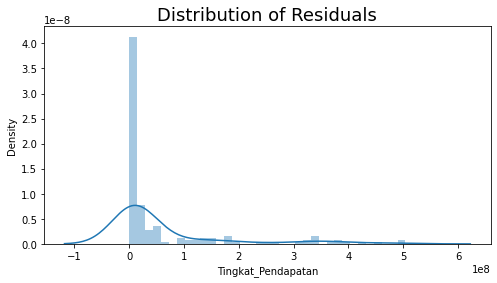

Residuals are not normally distributed


In [10]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(hotel['Tingkat_Pendapatan'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(hotel['Tingkat_Pendapatan'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


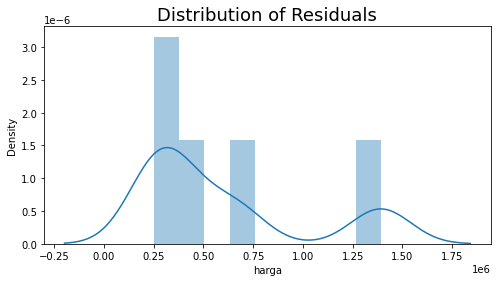

Residuals are not normally distributed


In [11]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(hotel['harga'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(hotel['harga'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Pearson correlation coefficient matrix of each variables:
                jenis_hotel         tahun         bulan  Okupansi  \
jenis_hotel   1.000000e+00  7.005353e-14  2.021461e-18  0.124266   
tahun         7.005353e-14  1.000000e+00  1.171351e-14 -0.516812   
bulan         2.021461e-18  1.171351e-14  1.000000e+00  0.050176   
Okupansi      1.242658e-01 -5.168116e-01  5.017610e-02  1.000000   
jumlah_kamar  9.396429e-01  8.540214e-14 -6.692394e-18  0.102879   
harga         8.929130e-01  9.026484e-14 -7.094312e-17  0.122294   
rating        9.349977e-01  3.819709e-14 -8.200614e-17  0.134475   
ac                     NaN           NaN           NaN       NaN   
restaurant    8.056237e-01  1.794989e-14 -5.962979e-17  0.132258   
parkir                 NaN           NaN           NaN       NaN   
wifi          3.535534e-01  2.271509e-14 -3.311603e-16 -0.060788   
kolam renang  9.585066e-01  5.723203e-14 -1.923866e-17  0.083389   

              jumlah_kamar         harga        rating  

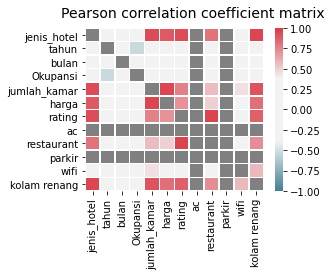

In [12]:
#Uji Multikolonieritas data
corr = hotel[['jenis_hotel', 'tahun', 'bulan', 'Okupansi', 'jumlah_kamar', 'harga', 'rating', 'ac', 'restaurant', 'parkir', 'wifi', 'kolam renang']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "None of [Index(['pie_Tingkat_Pendapatan', 'pie_Tingkat_Pendapatan_pred'], dtype='object')] are in the [columns]"

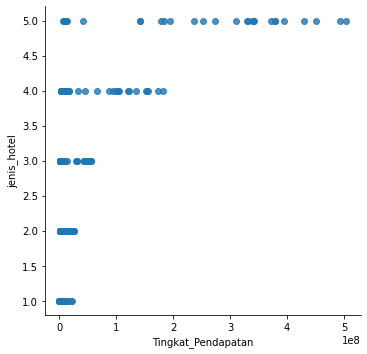

In [13]:
#Uji Linieritas Data
# Plotting the observed vs predicted values
sns.lmplot(x='Tingkat_Pendapatan', y='jenis_hotel', data=hotel, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(hotel[['pie_Tingkat_Pendapatan', 'pie_Tingkat_Pendapatan_pred']].min().min()-10, 
                        hotel[['pie_Tingkat_Pendapatan', 'pie_Tingkat_Pendapatan_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('pendapatan_pred', fontsize=14)
plt.xlabel('Actual pendapatan', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [ ]:
#Uji Autokorelasi
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(hotel['Tingkat_Pendapatan'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

In [ ]:
#Uji Heteroskedastisitas
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=hotel.jenis_hotel, y=hotel.Tingkat_Pendapatan, alpha=0.8)
plt.plot(np.repeat(0, len(hotel.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Tingkat Pendapatan', fontsize=14)
plt.xlabel('Tahun', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [ ]:
# create a python lost of feature names 
feature_cols = ['jenis_hotel', 'tahun', 'bulan', 'Okupansi', 'jumlah_kamar', 'harga', 'rating', 'ac', 'restaurant', 'parkir', 'wifi', 'kolam renang']

# use the list to select a subset of the original DataFrame 
X = hotel[feature_cols]

# equivalent command to do this in one line 
X = hotel[['jenis_hotel', 'tahun', 'bulan', 'Okupansi', 'jumlah_kamar', 'harga', 'rating', 'ac', 'restaurant', 'parkir', 'wifi', 'kolam renang']]

# print the first 5 rows 
X.head()

In [ ]:
# check the type and shape of X
print(type(X))
print(X.shape)

In [ ]:
# Select a Series from the DataFrame 
y = hotel['Tingkat_Pendapatan']

# Equivalent command that works if there are no spaces in the column name 
y = hotel.Tingkat_Pendapatan 

# print the first 5 rows 
y.head()

In [ ]:
# check the type and shape of y
print(type(y))
print(y.shape)

In [ ]:
#Splitting data menjadi training dan testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
# default split is 75% for training and 25% of testing 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Linear Regression in scikit-learn 
- in the case of classification : all the model did during fitting was to memorize the training data so that it could later caluclate the distance between a new obs & the existing obs
- in the case of linear regression : the model is learning the intercept and coefficients for the line of best fit. then it has an easy formula for makinf predictions during the predict step 


In [ ]:
# import model 
from sklearn.linear_model import LinearRegression 

# instatiate the model 
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

### Interpreting model coefficients 

In [ ]:
# print the intercept and coefficients 
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

How do we interpret the TV Coefficients (0.0466)? 
$$y = 24355185221.62 + -8297463.41 \times jenis_hotel + -12-64--8.97 \times tahun + n

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

Making Predictions

In [ ]:
# make predictions on testing set 
y_pred = linreg.predict(X_test)

## Model evaluation metrics for regression 
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values. 

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems

In [ ]:
# define true predicted response values 
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### 1. Mean Absolute Error (MAE) : is the mean of the absolute value of the errors

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculate MAE by hand 
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
from sklearn import metrics 
print(metrics.mean_absolute_error(true, pred))

In [ ]:
# calculate MSE by hand 
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using scikit-learn 
print(metrics.mean_squared_error(true, pred))

### 3. Root Mean Squared Error (RMSE) : is the square root of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculate RMSE by hand 
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using scikit-learn 
print(np.sqrt(metrics.mean_squared_error(true, pred)))

## Computing the RMSE for our Sales Predictions

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [1]:
import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

In [2]:
import numpy

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results